# Introduction :

Le rapport Sirugue présenté au Premier ministre en juillet 2013 pointe les faiblesses structurelles des deux dispositifs de soutien financier aux revenus d’activité des travailleurs modestes que sont le revenu de solidarité active (RSA) et la prime pour l’emploi (PPE).

Pour en améliorer l’efficacité, la prime d’activité (PPA) remplace à partir de janvier 2016 le crédit d’impôt ou impôt négatif (PPE) ainsi que le complément de revenu (RSA). Les conditions et procédures d’éligibilité sont modifiées. C'est pourquoi l’objectif de notre étude est d’identifier les gagnants et les perdants de cette réforme à travers l’étude de cas types.

Le recours à la prime d’activité se fait au niveau du ménage au sens de la CAF à l'instar du RSA, alors que la PPE était distribuée au niveau du foyer fiscal. La composition du foyer est ainsi un des principaux enjeux de cette étude : la situation conjugale, la présence ou non d’enfants, l’isolement du parent, mais aussi le forfait logement sont à prendre en compte afin d’identifier l’impact de la réforme. Enfin, il s’agit également d’aborder l’un des points importants de la réforme, la modification de l’âge d’éligibilité entre le RSA et la PPA. Notre attention s’est donc tout particulièrement portée sur cette variable afin d’identifier les changements de situations provoqués par la réforme.

I. Les différents cas types

A. Adulte célibataire sans enfant 

A.1. Adulte célibataire de 18 à 24 ans au SMIC horaire

A.2. Adulte célibataire d'au moins 25 ans au SMIC horaire

A.3. Adulte célibataire d'au moins 25 ans à 1,2 SMIC horaire

B. Couple légalement uni ou concubin sans enfant avec le même revenu au SMIC horaire

B.1. Couple légalement uni sans enfant avec le même revenu au SMIC horaire

B.2. Couple en concubinage sans enfant avec le même revenu au SMIC horaire

C. Couple légalement uni sans enfant avec différentes configurations de revenus

C.1. Couple légalement uni sans enfant dont l’un des deux gagne le SMIC horaire et l'autre n'a pas de revenu

C.2. Couple légalement uni sans enfant dont l’un des deux gagne le SMIC horaire et l'autre gagne le SMIC temps plein

D. Couple avec enfant(s) à charge

D.1. Couple avec 1 enfant à charge

D.2. Couple avec 2 enfants à charge

D.3. Couple avec 2 enfants à charge dont l'un a moins de 3 ans

E. Parent isolé

II. Commentaires sur les résultats et principales remarques

III. Conclusion

In [1]:
from datetime import date  # module nécessaire pour la définition des dates, dont notamment les dates de naissances
import openfisca_france    # module décrivant le système socio-fiscal français
import openfisca_core   
import numpy
from openfisca_core import periods

from __future__ import division

get_ipython().magic(u'matplotlib inline')
import matplotlib.pyplot as plt

TaxBenefitSystem = openfisca_france.init_country()  # Initialisation de la classe décrivant le système socio-fiscal français
tax_benefit_system = TaxBenefitSystem()  # Création d'une instance du système socio-fiscal français

In [2]:
scenario = tax_benefit_system.new_scenario()

In [3]:
simulation = tax_benefit_system.new_scenario().init_single_entity(parent1 = dict(age = 30), period = 2014).new_simulation()
from openfisca_core import periods

smic_by_year = dict()
for year in range(2005, 2017):
   instant = periods.period(year).start
   smic_by_year[year] = simulation.legislation_at(instant).cotsoc.gen.smic_h_b

Nous définissons ci-dessous une fonction qui permettra de décliner les différentes situations familiales ainsi que les différentes situations de revenus.

In [4]:
year = 2014
count = 1650
temps_plein = 1650
salaire_max = 25000
def create_scenario(nb_adultes = 1, parent1_25ans = 1, parent2_25ans = 1, coeff_smic = 1, nb_enfants = 0 , union_legale = 1, indexer = 0, test = 0):
    enfants_base_list = [dict(birth = date(2014 - age, 1, 1)) for age in range(5, 15)]
    scenario_kwargs = dict(
    axes = [[
            dict(
                count = count,
                min = 0,
                max = temps_plein,
                name = 'ppe_du_sa',
                period = year ,
                ),
            dict(
                count = count,
                min = 0,
                max = temps_plein,
                name = 'ppe_du_sa',
                period = year+1,
                ),
            dict(
                count = count,
                min = 0,
                max = smic_by_year[year] * temps_plein*coeff_smic,
                name = 'salaire_de_base',
                period = year ,
                ),
             dict(
                count = count,
                index = 1 if  indexer ==1 else None,
                min = 0,
                max = smic_by_year[year] * temps_plein*coeff_smic,
                name = 'salaire_de_base',
                period = year ,
                ),
         
              dict(
                count = count,
                min = 0,
                max = smic_by_year[year +1] * temps_plein*coeff_smic,
                name = 'salaire_de_base',
                period = year+1 ,
                ),
            dict(
                count = count,
                index = 1 if  indexer ==1 else None,
                min = 0,
                max = smic_by_year[year +1] * temps_plein*coeff_smic,
                name = 'salaire_de_base',
                period = year +1,
                ),
             dict(
                count = count, 
                min = 0,
                max = smic_by_year[year + 2] * temps_plein*coeff_smic,
                name = 'salaire_de_base',
                period = year + 2,
                ),
            dict(
                count = count,
                index = 1 if  indexer ==1 else None,
                min = 0,
                max = smic_by_year[year + 2] * temps_plein*coeff_smic,
                name = 'salaire_de_base',
                period = year + 2,
                ),
           
                   
                ]],
    period =  '{}:3'.format(year),
    parent1 = dict(
    birth = date(1987, 1, 1) if parent1_25ans == 1 else date(1993, 1, 1),
    statmarit = 1 if union_legale == 1 else 2,
            ),
    parent2 = dict(
    birth = date(1987, 1, 1)if parent2_25ans == 1 else date(1993, 1, 1),
    salaire_de_base = smic_by_year[year] * temps_plein *3  if test == 1 else None,
    statmarit = 1 if union_legale == 1 else 2,
            ) if nb_adultes == 2 else None,
    enfants = enfants_base_list[:nb_enfants],
        )
    scenario = tax_benefit_system.new_scenario().init_single_entity(**scenario_kwargs)
    return scenario

In [5]:
print scenario

Nous définissons ci-dessous une fonction qui permettra, en fonction du scenario défini, de définir nos variables de salaire, RSA, PPE et prime d'activité, ainsi que le calcul de la somme de l'ensemble des aides. La fonction permet aussi de produire une petite sélection des résultats et de les représenter sous forme de graphique.

In [6]:
def mes_aides(scenario) :
    salaire_year1 = simulation.calculate_add('salaire_de_base', period=year)
    salaire_year2 = simulation.calculate_add('salaire_de_base', period=year+1)
    salaire_year3 = simulation.calculate_add('salaire_de_base', period=year+2)
    
    rsa_year1 = simulation.calculate_add('rsa', period=year)
    rsa_year2 = simulation.calculate_add('rsa', period=year+1)
    rsa_year3 = simulation.calculate_add('rsa', period=year+2)
    
    ppe_year1 = simulation.calculate_add('ppe',year)
    ppe_year2 = simulation.calculate_add('ppe',year+1)
    
    ppa_year3 = simulation.calculate_add('ppa',year+2)
    
    total_aides_year1 = rsa_year1 + ppe_year1
    total_aides_year2 = rsa_year2 + ppe_year2
    total_aides_year3 = rsa_year3 + ppa_year3 
    
    print 'ordre des variables'
    print 'salaire_year1', 'salaire_year2', 'salaire_year3', 'rsa_year1', 'rsa_year2', 'rsa_year3', 'ppe_year1', 'ppe_year2', 'ppa_year3', 'total_aides_year1', 'total_aides_year2', 'total_aides_year3'
    
    print  salaire_year1, 
    print salaire_year2 
    print salaire_year3 
    print rsa_year1
    print rsa_year2
    print rsa_year3
    print ppe_year1
    print ppe_year2 
    print ppa_year3
    print total_aides_year1
    print total_aides_year2
    print total_aides_year3
    Figure1 = plt.figure()

    #plt.plot(salaire_year1, label = "salaire 2014")
    #plt.plot(salaire_year2, label = "salaire 2015")
    #plt.plot(salaire_year2, label = "salaire 2016")

    #plt.plot(rsa_year1, label = "RSA 2014")
    plt.plot(rsa_year2, label = "RSA 2015")
    #plt.plot(rsa_year3, label = "RSA 2016")

    #plt.plot(ppe_year1, label = "PPE 2014")
    plt.plot(ppe_year2, label = "PPE 2015")

    plt.plot(ppa_year3, label = "PPA 2016")

    #plt.plot(total_aides_year1, label = "total aides 2014")
    plt.plot(total_aides_year2, label = "total aides 2015")
    plt.plot(total_aides_year3, label = "total aides 2016")


    plt.legend(loc = 2, shadow=True, fancybox=True)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Explications de la fonction et commentaires généraux :
###Définition du scenario :
nb_adultes >         1=1  2=2
parent1_25ans >       1=>25 ans  2=<25 ans
parent2_25ans >       1=>25 ans  2=<25 ans

                    * PROGRESSION SUR LA FONCTION INITIALE * 
**********************
Pour avoir les deux salaires qui évoluent ensemble : indexer = 1 & test = 0
Pour avoir le salaire du parent 2 fixé à zéro : indexer = 0 & test = 0 
Pour avoir le salaire du parent 2 fixé au smic : indexer = 0 & test = 1 
**********************
Problèmes quand on fixe le salaire du parent2 au smic temps plein : 
    - le niveau du smic horaire (pour le parent1) prend la valeur 9.67 
    - les niveaux d'aides (RSA PPA etc) sont constants. 


nb_enfants >  indiquer le nombre d'enfants

union_legale >        1=mariés ; 2=concubins   (seulement si 2 adultes)

# A. Adulte célibataire sans enfant 

## A.1. Adulte célibataire de 18 à 24 ans sans enfant payé au SMIC horaire

In [7]:
scenario = create_scenario(nb_adultes = 1, parent1_25ans = 2)#, parent2_25ans = 1, coeff_smic = 1, nb_enfants = 0,  union_legale = 1, indexer =1, test =0)

In [8]:
#test de vérification du fonctionnement du statut marital possible pour différentes périodes
simulation.calculate('statmarit', period = 2015)

array([2], dtype=int16)

In [9]:
simulation = scenario.new_simulation()

ordre des variables
salaire_year1 salaire_year2 salaire_year3 rsa_year1 rsa_year2 rsa_year3 ppe_year1 ppe_year2 ppa_year3 total_aides_year1 total_aides_year2 total_aides_year3
[  0.00000000e+00   9.53577900e+00   1.90715580e+01 ...,   1.57054287e+04
   1.57149639e+04   1.57245000e+04] [  0.00000000e+00   9.61582756e+00   1.92316551e+01 ...,   1.58372686e+04
   1.58468838e+04   1.58565000e+04]
[  0.00000000e+00   9.67586422e+00   1.93517284e+01 ...,   1.59361484e+04
   1.59458242e+04   1.59555000e+04]
[   0.          768.88482666  766.10083008 ...,    0.            0.            0.        ]
[   0.          937.44720459  934.08288574 ...,    0.            0.            0.        ]
[    0.          2502.40795898  2493.49560547 ...,     0.             0.
     0.        ]
[   0.            0.            0.         ...,  752.15527344  752.06933594
  753.7277832 ]
[   0.            0.            0.         ...,  736.28118896  736.18499756
  737.8380127 ]
[    0.             0.             0. 

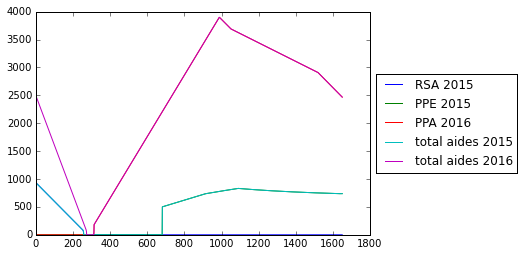

In [10]:
mes_aides(scenario)

Commentaires : 
En 2015, il apparaît du RSA. Pour autant, nous avons un jeune de moins de 25 ans, seulement éligible s'il a travaillé au moins 3214 heures au cours des trois dernières années. Ca nous paraît étrange. Avec un temps plein à 1650 heures, en 2014 et en 2015, notre jeune n'aurait droit au RSA que pour les deux dernières semaines de 2015. Ce qui ne pourrait monter jusque 1000 euros. Par ailleurs, nous faisons évoluer le temps de travail de notre travailleur avec 'ppe_du_sa'. Toutefois, cela n'est sûrement pas appelé par la fonction rsa. Devons-nous déclarer une atre variable de temps de travail pour le rsa jeunes ?
Un élément qui nous chagrine particulièrement est qu'avec nos axes, le premier point de RSA est bien égal à zéro comme on le voit dans les données produites juste au-dessus du graphique... Pourquoi y a-t-il du RSA à partir d'une heure travaillée ?

## A.2. Adulte célibataire sans enfant de plus de 25 ans payé au SMIC horaire

In [11]:
scenario = create_scenario(nb_adultes = 1 , parent1_25ans = 1) #, parent2_25ans = 1, coeff_smic = 1, nb_enfants = 1, union_legale = 2)

In [12]:
simulation = scenario.new_simulation()

ordre des variables
salaire_year1 salaire_year2 salaire_year3 rsa_year1 rsa_year2 rsa_year3 ppe_year1 ppe_year2 ppa_year3 total_aides_year1 total_aides_year2 total_aides_year3
[  0.00000000e+00   9.53577900e+00   1.90715580e+01 ...,   1.57054287e+04
   1.57149639e+04   1.57245000e+04] [  0.00000000e+00   9.61582756e+00   1.92316551e+01 ...,   1.58372686e+04
   1.58468838e+04   1.58565000e+04]
[  0.00000000e+00   9.67586422e+00   1.93517284e+01 ...,   1.59361484e+04
   1.59458242e+04   1.59555000e+04]
[ 6031.6796875   6800.56494141  6797.78027344 ...,  2220.86987305
  2218.08544922  2215.3046875 ]
[ 6207.68017578  7145.12695312  7141.76367188 ...,  1611.0456543
  1607.68481445  1604.32458496]
[ 6289.92041016  8792.328125    8783.41503906 ...,     0.             0.
     0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[    0.             0.             0.         ...,  2474.23120117
  2470.84814453  2467.46386719]
[ 6031.6796875   6800.56494141  6797.78027344 ...

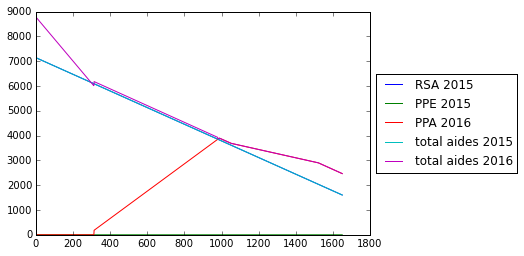

In [13]:
mes_aides(scenario)

Commentaires : 
  
 Le RSA bondit entre 2015 et 2016 de 7150 à 8800 pour une heure travaillée ce qui nous parait étrange au regard de la législation où rien ne semble justifier ce bond. 
    Nous remarquons néanmoins que pour la première observation (i.e.: zéro heure de travail), le montant du RSA augmente uniquement de la revalorisation annuelle, soit de 6208 à 6290. Y aurait-il une explication que nous ne trouvons pas, notamment dans le paramétrage de nos fonctions ?
    
Pour ce qui est de la PPE, d'après notre lecture de la législation, confirmée par nos estimations croisées à partir de plusieurs simulateurs parmi lesquels: "prime-pour-emploi.com", le montant de PPE auquel cet individu à droit s'élèverait normalement à 289€ dans la situation où il travaille à temps plein. Pour du temps partiel, la PPE devrait apparaitre à partir d'environ 500 heures travaillées. 
Or notre scénario OpenFisca estime quant à lui que cet individu n'a jamais droit à aucune PPE.
    

## A.3. Adulte célibataire d'au moins 25 ans à 1,2 SMIC horaire

In [14]:
scenario = create_scenario(nb_adultes = 1 , parent1_25ans = 1, coeff_smic = 1.2) #, parent2_25ans = 1, nb_enfants = 1, union_legale = 2)

In [15]:
simulation = scenario.new_simulation()

ordre des variables
salaire_year1 salaire_year2 salaire_year3 rsa_year1 rsa_year2 rsa_year3 ppe_year1 ppe_year2 ppa_year3 total_aides_year1 total_aides_year2 total_aides_year3
[  0.00000000e+00   1.14429350e+01   2.28858700e+01 ...,   1.88465137e+04
   1.88579570e+04   1.88694004e+04] [  0.00000000e+00   1.15389929e+01   2.30779858e+01 ...,   1.90047227e+04
   1.90162617e+04   1.90278008e+04]
[  0.00000000e+00   1.16110373e+01   2.32220745e+01 ...,   1.91233770e+04
   1.91349883e+04   1.91465996e+04]
[ 6031.6796875   6800.00683594  6796.66943359 ...,  1371.2166748
  1368.40893555  1365.56225586]
[ 6207.68017578  7144.45068359  7140.41894531 ...,   585.07861328
   581.61212158   578.27227783]
[ 6289.92041016  8790.53808594  8779.859375   ...,     0.             0.
     0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[    0.             0.             0.         ...,  1441.99316406
  1438.5892334   1435.03918457]
[ 6031.6796875   6800.00683594  6796.66943359 ...

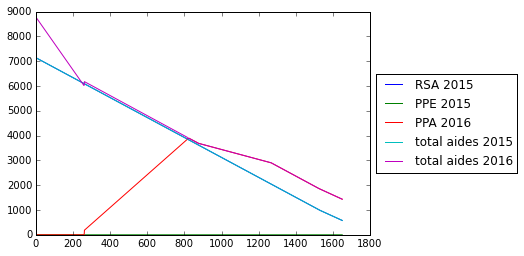

In [16]:
mes_aides(scenario)

Commentaires:
On remarque sur le graphique que le niveau d'aide de 2016 est plus intéressant que le niveau d'aides de 2015 dès 800 heures travaillées environ. Toutefois, là aussi, la PPE qui demeure fixée à zéro pose problème dans l'interprétation.


# B. Couple légalement uni ou concubin sans enfant avec le même revenu au SMIC horaire


## B.1. Couple légalement uni sans enfant avec le même revenu au SMIC horaire

In [17]:
scenario = create_scenario(nb_adultes = 2 , parent1_25ans = 1, parent2_25ans = 1, coeff_smic = 1, nb_enfants = 0, union_legale = 1, indexer = 1, test = 0)

In [18]:
simulation = scenario.new_simulation()

ordre des variables
salaire_year1 salaire_year2 salaire_year3 rsa_year1 rsa_year2 rsa_year3 ppe_year1 ppe_year2 ppa_year3 total_aides_year1 total_aides_year2 total_aides_year3
[  0.00000000e+00   0.00000000e+00   9.53577900e+00 ...,   1.57149639e+04
   1.57245000e+04   1.57245000e+04] [  0.00000000e+00   0.00000000e+00   9.61582756e+00 ...,   1.58468838e+04
   1.58565000e+04   1.58565000e+04]
[  0.00000000e+00   0.00000000e+00   9.67586422e+00 ...,   1.59458242e+04
   1.59555000e+04   1.59555000e+04]
[ 9047.52050781  9816.40527344  9813.62109375 ...,  5236.7109375
  5233.92578125  5231.14550781]
[  9311.52050781  10248.96777344  10245.6015625  ...,   4714.88574219
   4711.52539062   4708.16503906]
[  9434.88085938  11937.2890625   11928.37695312 ...,      0.              0.
      0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[    0.             0.             0.         ...,  5619.19091797
  5615.80957031  5612.42333984]
[ 9047.52050781  9816.40527344  9813.

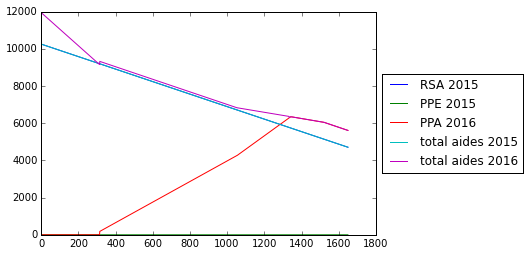

In [19]:
mes_aides(scenario)

Commentaires : 
    
Quand nous comparons avec le cas du célibataire sans enfant, nous observons que dans le cas du couple marié :
- le calcul de la prime d'activité prend bien en compte les deux individus,
- en revanche, pour le RSA et la PPE, les montants ne changent pas.

Comment "corriger" ce calcul de RSA et PPE ?

## B.2. Couple en concubinage sans enfant avec le même revenu au SMIC horaire

In [20]:
scenario = create_scenario(nb_adultes = 2 , parent1_25ans = 1, parent2_25ans = 1, coeff_smic = 1, nb_enfants = 0, union_legale = 2, indexer = 1, test = 0)

In [21]:
simulation = scenario.new_simulation()

ordre des variables
salaire_year1 salaire_year2 salaire_year3 rsa_year1 rsa_year2 rsa_year3 ppe_year1 ppe_year2 ppa_year3 total_aides_year1 total_aides_year2 total_aides_year3
[  0.00000000e+00   0.00000000e+00   9.53577900e+00 ...,   1.57149639e+04
   1.57245000e+04   1.57245000e+04] [  0.00000000e+00   0.00000000e+00   9.61582756e+00 ...,   1.58468838e+04
   1.58565000e+04   1.58565000e+04]
[  0.00000000e+00   0.00000000e+00   9.67586422e+00 ...,   1.59458242e+04
   1.59555000e+04   1.59555000e+04]
[ 9047.52050781  9816.40527344  9813.62109375 ...,  5236.7109375
  5233.92578125  5231.14550781]
[  9311.52050781  10248.96777344  10245.6015625  ...,   4714.88574219
   4711.52539062   4708.16503906]
[  9434.88085938  11937.2890625   11928.37695312 ...,      0.              0.
      0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[    0.             0.             0.         ...,  5619.19091797
  5615.80957031  5612.42333984]
[ 9047.52050781  9816.40527344  9813.

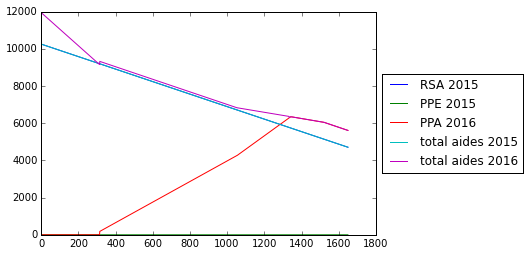

In [22]:
mes_aides(scenario)

Commentaires :
Le changement devrait s'observer sur la PPE... mais puisque la PPE n'apparaît pas, le cas-type a pour le moment peu d'intérêt.

# C. Couple légalement uni sans enfant avec différentes configurations de revenus

## C.1. Couple légalement uni sans enfant dont l’un des deux gagne le SMIC horaire et l'autre n'a pas de revenu

In [23]:
scenario = create_scenario(nb_adultes = 2 , parent1_25ans = 1, parent2_25ans = 1, nb_enfants = 0, coeff_smic = 1, union_legale = 1, indexer = 0, test = 0)

In [24]:
simulation = scenario.new_simulation()

ordre des variables
salaire_year1 salaire_year2 salaire_year3 rsa_year1 rsa_year2 rsa_year3 ppe_year1 ppe_year2 ppa_year3 total_aides_year1 total_aides_year2 total_aides_year3
[  0.00000000e+00   0.00000000e+00   9.53577900e+00 ...,   0.00000000e+00
   1.57245000e+04   0.00000000e+00] [  0.00000000e+00   0.00000000e+00   9.61582756e+00 ...,   0.00000000e+00
   1.58565000e+04   0.00000000e+00]
[  0.00000000e+00   0.00000000e+00   9.67586422e+00 ...,   0.00000000e+00
   1.59555000e+04   0.00000000e+00]
[ 9047.52050781  9816.40527344  9813.62109375 ...,  5236.7109375
  5233.92578125  5231.14550781]
[  9311.52050781  10248.96777344  10245.6015625  ...,   4714.88574219
   4711.52539062   4708.16503906]
[  9434.88085938  11937.2890625   11928.37695312 ...,      0.              0.
      0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[    0.             0.             0.         ...,  5619.19091797
  5615.80957031  5612.42333984]
[ 9047.52050781  9816.40527344  9813.

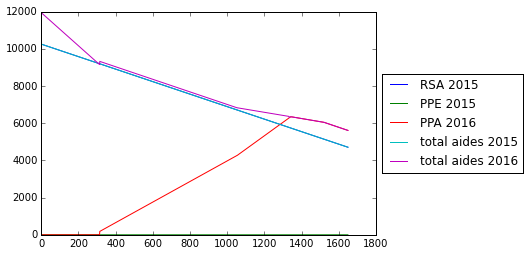

In [25]:
mes_aides(scenario)

Commentaires : 
Mêmes aides que dans le cas des deux salaires qui évoluent en même temps. Alors que l'on voit bien dans le repot des salaires juste au-dessus du graphique qu'il y a bien un salaire de base fixé à 0. Cela laisse penser que les aides sociales ne semblent pas être calculées comme nous pourrions le penser sur base du cumul des revenus d'activités des deux adultes. Ou quelque chose nous échappe. 


## C.2. Couple légalement uni sans enfant dont l’un des deux gagne le SMIC horaire et l'autre gagne le SMIC temps plein

In [26]:
scenario = create_scenario(nb_adultes = 2, parent1_25ans = 1, parent2_25ans = 1, coeff_smic = 1, nb_enfants = 0,  union_legale = 1, indexer =0, test =1)

In [27]:
simulation = scenario.new_simulation()

ordre des variables
salaire_year1 salaire_year2 salaire_year3 rsa_year1 rsa_year2 rsa_year3 ppe_year1 ppe_year2 ppa_year3 total_aides_year1 total_aides_year2 total_aides_year3
[  0.00000000e+00   1.57245000e+04   9.67586422e+00 ...,   1.57245000e+04
   1.59555000e+04   1.57245000e+04] [  0.00000000e+00   1.57245000e+04   9.67586422e+00 ...,   1.57245000e+04
   1.59555000e+04   1.57245000e+04]
[  0.00000000e+00   1.57245000e+04   9.67586422e+00 ...,   1.57245000e+04
   1.59555000e+04   1.57245000e+04]
[ 5231.14550781  5231.14550781  5231.14550781 ...,  5231.14550781
  5231.14550781  5231.14550781]
[ 4746.67773438  4746.67773438  4746.67773438 ...,  4746.67773438
  4746.67773438  4746.67773438]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 5687.52832031  5687.52832031  5687.52832031 ...,  5687.52832031
  5687.52832031  5687.52832031]
[ 5231.14550781  5231.14550781  5231.14550781 ...,  5231.14550781
  5231.14550781  5231.14550781]
[ 4746.67

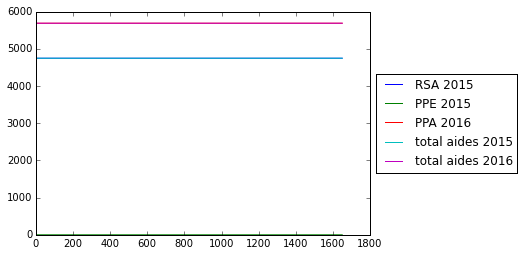

In [28]:
mes_aides(scenario)

Commentaires :
Ici 4746 euros de RSA en année 2015 et 5687 de prime d'activité en 2016. Pourquoi pas mais ce qui est surprenant est que le niveau d'aide ne varie pas avec la variation du salaire du parent 1 (par son temps de travail) sur l'axe. Pas de PPE, ce qui est surprenant.

# D. Couple avec enfant(s) à charge

## D.1. Couple avec 1 enfant à charge

In [29]:
scenario = create_scenario(nb_adultes = 2, parent1_25ans = 1, parent2_25ans = 1, coeff_smic = 1, nb_enfants = 1,  union_legale = 1, indexer =1, test =0)

In [30]:
simulation = scenario.new_simulation()

ordre des variables
salaire_year1 salaire_year2 salaire_year3 rsa_year1 rsa_year2 rsa_year3 ppe_year1 ppe_year2 ppa_year3 total_aides_year1 total_aides_year2 total_aides_year3
[     0.       0.       0.  ...,  15724.5  15724.5      0. ] [     0.       0.       0.  ...,  15856.5  15856.5      0. ]
[     0.       0.       0.  ...,  15955.5  15955.5      0. ]
[ 10857.02441406  11625.91015625  11623.12304688 ...,   7046.21484375
   7043.42822266   7040.64941406]
[ 11173.82421875  12111.27246094  12107.90527344 ...,   6577.18994141
   6573.82910156   6570.46972656]
[ 11321.85644531  13824.265625    13815.35351562 ...,      0.              0.
      0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[    0.             0.             0.         ...,  7506.16699219
  7502.78613281  7499.39990234]
[ 10857.02441406  11625.91015625  11623.12304688 ...,   7046.21484375
   7043.42822266   7040.64941406]
[ 11173.82421875  12111.27246094  12107.90527344 ...,   6577.18994141
   

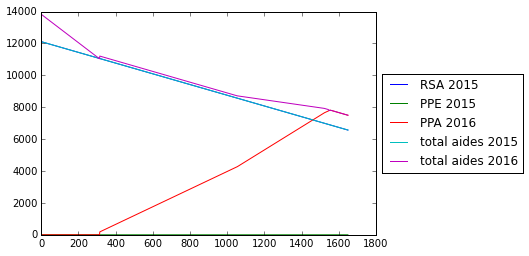

In [31]:
mes_aides(scenario)

Commentaires :

On remarque que l'enfant fait bien augmenter les aides mais il y a toujours ce saut dans le RSA entre 2015 et 2016 et il n'y a pas de PPE, ce qui est surprenant.

## D.2. Couple avec 2 enfants à charge

In [32]:
scenario = create_scenario(nb_adultes = 2, parent1_25ans = 1, parent2_25ans = 1, coeff_smic = 1, nb_enfants = 2,  union_legale = 1, indexer =1, test =0)

In [33]:
simulation = scenario.new_simulation()

ordre des variables
salaire_year1 salaire_year2 salaire_year3 rsa_year1 rsa_year2 rsa_year3 ppe_year1 ppe_year2 ppa_year3 total_aides_year1 total_aides_year2 total_aides_year3
[     0.       0.       0.  ...,  15724.5      0.       0. ] [     0.       0.       0.  ...,  15856.5      0.       0. ]
[     0.       0.       0.  ...,  15955.5      0.       0. ]
[ 11108.98828125  11877.87402344  11875.08984375 ...,   7298.17773438
   7295.39453125   7292.61230469]
[ 11476.24902344  12413.6953125   12410.33203125 ...,   6879.61230469
   6876.25195312   6872.89208984]
[ 11648.95214844  14151.36035156  14142.44824219 ...,      0.              0.
      0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[    0.             0.             0.         ...,  7833.26367188
  7829.88183594  7826.49414062]
[ 11108.98828125  11877.87402344  11875.08984375 ...,   7298.17773438
   7295.39453125   7292.61230469]
[ 11476.24902344  12413.6953125   12410.33203125 ...,   6879.61230469
   

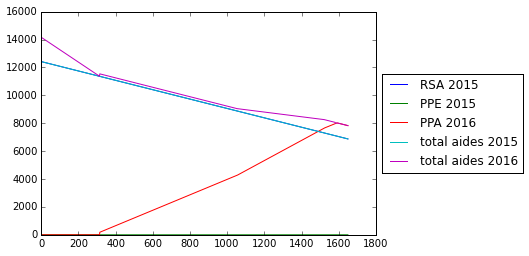

In [34]:
mes_aides(scenario)

Commentaires : 

Les aides sont encore un peu plus élevées mais toujours le saut et pas de PPE. 

## D.3. Couple avec 2 enfants à charge dont l'un a moins de 3 ans

In [35]:
#scenario = create_scenario(nb_adultes = 2, parent1_25ans = 1, parent2_25ans = 1, coeff_smic = 1, nb_enfants = 2,  union_legale = 1, indexer =1, test =0)

In [36]:
#simulation = scenario.new_simulation()

In [38]:
#mes_aides(scenario)

Commentaires : 
    
    Malgré quelques essais, nous ne sommes pas parvenus à transformer la fonction pour distinguer les enfants de moins de 3 ans.

# E. Parent isolé avec un enfant

In [39]:
scenario = create_scenario(nb_adultes = 1, parent1_25ans = 1,  coeff_smic = 1, nb_enfants = 1)

In [40]:
simulation = scenario.new_simulation()

ordre des variables
salaire_year1 salaire_year2 salaire_year3 rsa_year1 rsa_year2 rsa_year3 ppe_year1 ppe_year2 ppa_year3 total_aides_year1 total_aides_year2 total_aides_year3
[  0.00000000e+00   0.00000000e+00   9.53577900e+00 ...,   0.00000000e+00
   1.57245000e+04   0.00000000e+00] [  0.00000000e+00   0.00000000e+00   9.61582756e+00 ...,   0.00000000e+00
   1.58565000e+04   0.00000000e+00]
[  0.00000000e+00   0.00000000e+00   9.67586422e+00 ...,   0.00000000e+00
   1.59555000e+04   0.00000000e+00]
[ 7952.38720703  8721.27148438  8718.48730469 ...,  4141.57666016
  4138.79199219  4136.01171875]
[ 8214.75390625  9152.20019531  9148.8359375  ...,  3618.11889648
  3614.75683594  3611.39770508]
[  8338.11328125  10840.52050781  10831.61035156 ...,      0.              0.
      0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[    0.             0.             0.         ...,  4522.42480469
  4519.04199219  4515.65722656]
[ 7952.38720703  8721.27148438  8718.48730

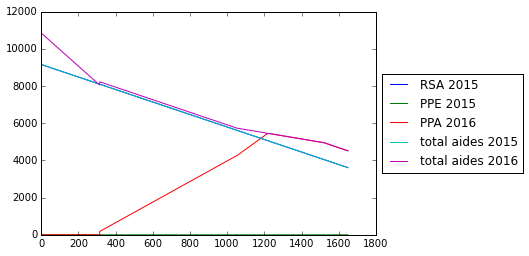

In [41]:
mes_aides(scenario)

Commentaires :

Toujours pas de PPE en 2015. Le saut du début de distribution pour le RSA.

Merci Mahdi pour ton aide !